In [1]:
import numpy
import os
import pykitti
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
from keras.models import load_model


Using TensorFlow backend.


In [70]:
model_dir = '/home/sexy/source/deep-visual-odometry/models/'
which_model = 'alexNet_3/alexNet_3_trined_5.h5'

model = load_model(model_dir+which_model)

In [72]:
import formatData
Xtr, Ytr, Xte, Yte = formatData.knownEnv(formatData.load_data(),formatData.load_poses(), training_ratio=(1/2.0))

Loading poses for sequence 00...
done.
Loading poses for sequence 01...
done.
Loading poses for sequence 02...
done.
Loading poses for sequence 03...
done.
Loading poses for sequence 04...
done.
Loading poses for sequence 05...
done.
Loading poses for sequence 06...
done.
Loading poses for sequence 07...
done.
Loading poses for sequence 08...
done.
Loading poses for sequence 09...
done.
Loading poses for sequence 10...
done.


In [73]:
classes = model.predict_proba(Xte, batch_size=8)

4649/4649 [==============================] - 23s      

/usr/local/lib/python3.5/dist-packages/keras/models.py:815: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


In [66]:
import numpy as np
plot_data = np.zeros((Yte.shape[0],4))
for i in range(Yte.shape[0]):
    plot_data[i,0] = np.sum(Yte[:i,0])
    plot_data[i,1] = np.sum(Yte[:i,2])
    plot_data[i,2] = np.sum(classes[:i,0])
    plot_data[i,3] = np.sum(classes[:i,2])

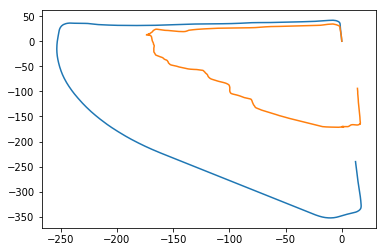

In [75]:
plt.plot(plot_data[:908,0], plot_data[:908,1], plot_data[:908,2], plot_data[:908,3])
plt.show()

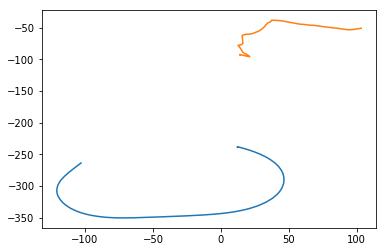

In [69]:
plt.plot(plot_data[908:908+220,0], plot_data[908:908+220,1], plot_data[908:908+220,2], plot_data[908:908+220,3])
plt.show()

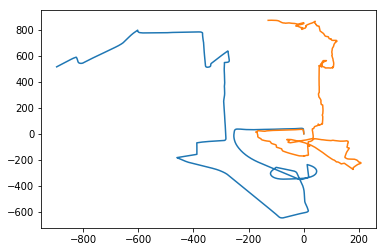

In [74]:
plt.plot(plot_data[:,0], plot_data[:,1], plot_data[:,2], plot_data[:,3])
plt.show()

In [56]:
data = pykitti.odometry("/home/sexy/Documents/dataset/", '01')
data.load_poses()
Y = np.zeros((len(data.T_w_cam0),3))
for j in range(len(data.T_w_cam0)):
    Y[j,:] = data.T_w_cam0[j][:-1,-1]

Loading poses for sequence 01...
done.


(1101, 3)


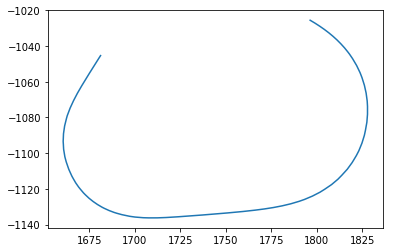

In [58]:
print(Y.shape)
plt.plot(Y[-220:,0], Y[-220:,2])
plt.show()

In [26]:
for i in range(20):
    print (" ")
    for j in range(3):
        print (classes[i,j] - Yte[i,j])

 
-0.888649280167
0.0561497471894
-1.03595642033
 
-0.898189000511
0.058059503193
-1.0444500422
 
-0.919999188118
0.058909413322
-1.0565911581
 
-0.94267853344
0.0652536401424
-1.06953861885
 
-0.95554837265
0.0758839194694
-1.08116325917
 
-0.956073415565
0.0787186217861
-1.07350945003
 
-0.955238867683
0.072225155817
-1.06081159477
 
-0.95201374485
0.0714016185546
-1.04990102134
 
-0.952153966789
0.066355558764
-1.02884243673
 
-0.952410262184
0.0650349803758
-1.00818967885
 
-0.949352391243
0.0679979150004
-0.984836421096
 
-0.943232492485
0.0716075976453
-0.96722544508
 
-0.938810380135
0.0721945489726
-0.943774948502
 
-0.924911702805
0.0677597732973
-0.914810353088
 
-0.895514533615
0.0667558772197
-0.865852154398
 
-0.864207420692
0.0604199958954
-0.810436781359
 
-0.817324187889
0.056916080155
-0.739011250877
 
-0.782821048088
0.0527253064924
-0.692530588341
 
-0.765487616043
0.0552402537129
-0.664683729982
 
-0.765023946533
0.0523586065737
-0.645973620176


In [30]:
print (Yte[:200])

[[ -4.99000000e-02  -2.63620000e-02   1.24690000e+00]
 [ -5.06000000e-02  -2.70170000e-02   1.23870000e+00]
 [ -4.98200000e-02  -2.59710000e-02   1.22770000e+00]
 [ -5.38700000e-02  -3.00160000e-02   1.21680000e+00]
 [ -5.83500000e-02  -3.90040000e-02   1.20940000e+00]
 [ -5.97000000e-02  -4.14580000e-02   1.19570000e+00]
 [ -5.68300000e-02  -3.50360000e-02   1.18130000e+00]
 [ -5.69800000e-02  -3.40150000e-02   1.16210000e+00]
 [ -5.43700000e-02  -2.90240000e-02   1.13850000e+00]
 [ -5.54200000e-02  -2.77700000e-02   1.12100000e+00]
 [ -6.07500000e-02  -3.07570000e-02   1.10040000e+00]
 [ -6.39600000e-02  -3.47960000e-02   1.09080000e+00]
 [ -6.38400000e-02  -3.59960000e-02   1.08040000e+00]
 [ -6.10700000e-02  -3.30450000e-02   1.07080000e+00]
 [ -5.99000000e-02  -3.45990000e-02   1.05240000e+00]
 [ -5.16400000e-02  -3.16660000e-02   1.03720000e+00]
 [ -4.78600000e-02  -3.25990000e-02   1.01890000e+00]
 [ -4.31800000e-02  -3.13400000e-02   1.00170000e+00]
 [ -4.22700000e-02  -3.46710

In [19]:
print (classes[:200])

[[ -9.38549280e-01   2.97877472e-02   2.10943580e-01]
 [ -9.48789001e-01   3.10425032e-02   1.94249958e-01]
 [ -9.69819188e-01   3.29384133e-02   1.71108842e-01]
 [ -9.96548533e-01   3.52376401e-02   1.47261381e-01]
 [ -1.01389837e+00   3.68799195e-02   1.28236741e-01]
 [ -1.01577342e+00   3.72606218e-02   1.22190550e-01]
 [ -1.01206887e+00   3.71891558e-02   1.20488405e-01]
 [ -1.00899374e+00   3.73866186e-02   1.12198979e-01]
 [ -1.00652397e+00   3.73315588e-02   1.09657563e-01]
 [ -1.00783026e+00   3.72649804e-02   1.12810321e-01]
 [ -1.01010239e+00   3.72409150e-02   1.15563579e-01]
 [ -1.00719249e+00   3.68115976e-02   1.23574555e-01]
 [ -1.00265038e+00   3.61985490e-02   1.36625051e-01]
 [ -9.85981703e-01   3.47147733e-02   1.55989647e-01]
 [ -9.55414534e-01   3.21568772e-02   1.86547846e-01]
 [ -9.15847421e-01   2.87539959e-02   2.26763219e-01]
 [ -8.65184188e-01   2.43170802e-02   2.79888749e-01]
 [ -8.26001048e-01   2.13853065e-02   3.09169412e-01]
 [ -8.07757616e-01   2.05692

(256, 256, 3)


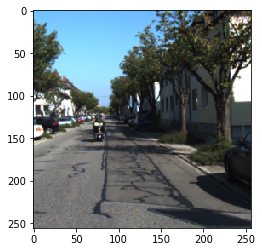

In [21]:
f = imread(directory)
plt.imshow(f)
h = imresize(crop(f), (256,256))
print (h.shape)
plt.imshow(h)
plt.show()

In [4]:
#import kitti_data_rearrange